# Варіант 18

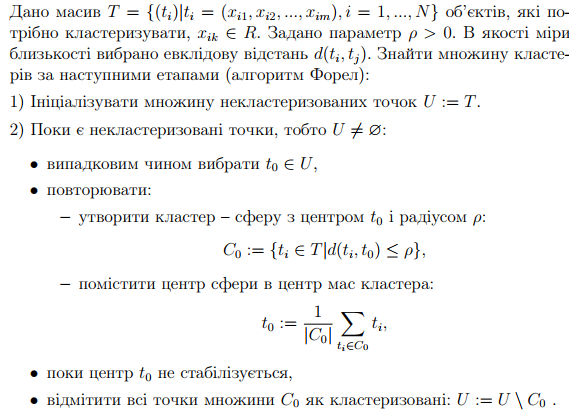

## Власне алгоритм

In [1]:
import numpy as np
from numpy.linalg import norm as d
import random 
%matplotlib inline

def sphere_maker(array, t_0, R):
    n = array.shape[1]
    C_0 = np.zeros((1,n))
    for i in range(array.shape[0]):
        if d(array[i] - t_0) <= R:
            C_0 = np.vstack((C_0, array[i]))
    return C_0[1:]
    
    
def sphere_center(C_0):
    card_of_C0 = C_0.shape[0]
    return np.sum(C_0, axis = 0) / card_of_C0
        

def forel_algorithm(array, R):
    N =  array.shape[0]
    final_array = []
    
    for i in range(N):
        
        if N != 0:
            rand_num = random.randint(0, N-1)
        else:
            break
        
        t_0 = array[rand_num]
        C_0 = sphere_maker(array, t_0, R)
        t_00 = sphere_center(C_0)
        
        while d(t_00 - t_0) != 0:
            t_0 = t_00
            C_0 = sphere_maker(array, t_0, R)
            t_00 = sphere_center(C_0)
        
        
        final_array.append(C_0.tolist())
        
        N = N - C_0.shape[0]
        
        #deleting elemensts from array that is in C_0
        C_0 = C_0.tolist()
        array = array.tolist()
        array = [i for i in array if i not in C_0]
        array = np.array(array)
        
    return final_array
        

## Зобразимо роботу алгоритму в двохвимірному просторі
Для цього створимо двохвимірний масив випадковими числами, які будуть позначати координати.

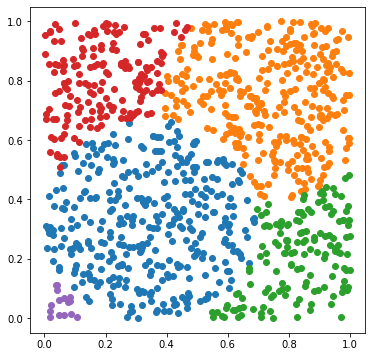

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

U = np.random.rand(1000, 2)
splited = forel_algorithm(U, 0.35)

for cords in splited:
    cords = np.array(cords)
    X = cords[:, 0]
    Y = cords[:, 1]
    plt.scatter(X, Y)

    
plt.show()

## Зобразимо роботу алгоритму в трьохвимірному просторі
Для цього створимо трьохвимірний масив випадковими числами, які будуть позначати координати. Зобразимо наш графік з різних ракурсів.

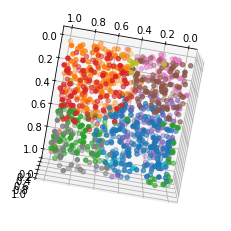

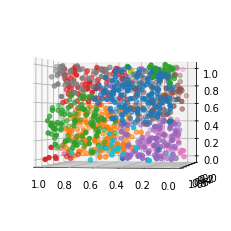

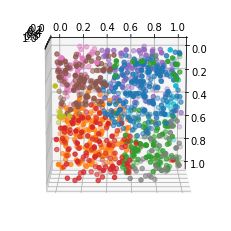

In [3]:
from mpl_toolkits.mplot3d import Axes3D

U = np.random.rand(1000, 3)
splited = forel_algorithm(U, 0.35)

def plot(splited, angles = (30, 150)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.view_init(angles[0], angles[1])
    
    for coords in splited:
        coords = np.array(coords)
        X = coords[:, 0]
        Y = coords[:, 1]
        Z = coords[:, 2]
        ax.scatter(X, Y, Z)
    
    
plot(splited, (100,100))
plot(splited, (0,100))
plot(splited, (100,0))

## Висновок

В ході даної лабораторної роботи я отримав навички роботи з Python. Також я навчився використовувати стандартні функції бібліотек numpy та matplotlib.